## Import Library dan Load Data 

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv('dataset/train.csv')
data_test = pd.read_csv('dataset/test.csv')

In [3]:
#untuk melihat banyak data pada data train

data_train.shape

(31962, 3)

In [4]:
#untuk melihat banyak data pada data test

data_test.shape

(17197, 2)

In [5]:
#mengambil 5 data teratas pada data train

data_train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#mengambi 5 data terbawah pada data train

data_train.tail(5)

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [7]:
#mengamnil 5 data secara acak pada data train

data_train.sample(5)

,id,label,tweet
21144,21145,0,"you guys, i've never stayed in such a nice hot..."
8772,8773,1,"@user suck it, haters! #hillary voters hate/fe..."
4931,4932,0,every time a young person dies am always left ...
10173,10174,0,happy sunday! ð link ð in ð the ð ...
12863,12864,0,"""why are you so far away from me."" #missing #b..."


In [8]:
#deskripsi data pada data train

data_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [9]:
#melihat kolom pada data train

data_train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [10]:
#menghitung jumlah variabel pada kolom tweets
data_train['tweet'].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                 319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets                    82
aww yeah it's all good bing bong bing bong                                                                            75
i'm so   and #grateful now that - #affirmations                                                                       56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                                  40
                                                                                                                    ... 
 @user who gets to be   and why? (via @user @user  #emotion #anger #society                                            1
@user @user any view on this @user you seem to be campaigning across the country today not remembering #jocoxmp        1
   queen_uk: two bihdays in a ye

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

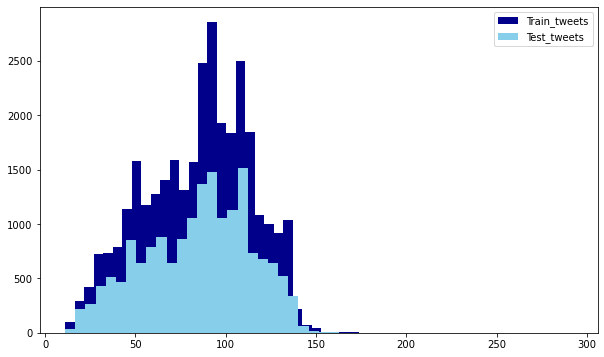

In [12]:
#melihat panjang tweet dalam data train dan data test

length_train = data_train['tweet'].str.len()
length_test = data_test['tweet'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_tweets", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_tweets', color = "skyblue")
plt.legend()

### Membuat train_test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=data_train.label
y=data_train.tweet

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=225)

In [16]:
#melihat pembagian data di x_train, x_test, y_train dan y_test

print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))



Banyak data x_train : 28765
Banyak data x_test  : 3197
Banyak data y_train : 28765
Banyak data y_test  : 3197


## Preprocessing

Pada tahap ini yang dilakukan adalah membuat data yang ada menjadi data yang lebih berkualitas atau lebih baik, dikarenakan pada data mentah masih ada yang mengandung agregat data, noisy data yang masih mengandung error dan outliers, serta ada nya data yang tidak konsisten.

In [17]:
import re

In [18]:
pip install -U beautifulsoup4


The following command must be run outside of the IPython shell:

    $ pip install -U beautifulsoup4

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [19]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import numpy as np

In [20]:
def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [21]:
merge = data_train.append(data_test, ignore_index=True, sort=False)
merge.shape

(49159, 3)

In [22]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' #menghilangkat username
pat2 = r'https?://[^ ]+' #menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) #join pat1 dan pat 2
www_pat = r'www.[^ ]+' #menghilangkan situs website

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

merge['clean_tweet'] = np.vectorize(remove_pattern)(merge['tweet'], "@[\w]*") #menghilangkan @user
merge['clean_tweet'] = merge['clean_tweet'].str.replace("[^a-zA-Z#]", " ") #menghilangkan punctuation, angka, dan karakter
merge['clean_tweet'] = merge['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #menghapus kata pendek

In [24]:
merge.head(5)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Tokenization

Tahap ini merupakan proses memecah dokumen yang terdiri dari sekumpulan kalimat menjadi bagian-bagian kata yang disebut dengan token

In [25]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

### Stemming

Tahap ini merupakan mantransformasi kata menjadi kata dasar dengan menghilangkan imbuhan kata

In [26]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

### Transformation

In [27]:
#menambahkan tweet yang sudah bersih ke dalam data frame

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
merge['clean_tweet'] = tokenized_tweet
merge.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### Visualiasasi dengan data yang sudah bersih, dengan menggunakan Word Cloud

In [28]:
#untuk melihat sentimen yang ada pada seluruh data train. Dapat dilihat dengan memahami kata yang umum dengan plot word cloud

from wordcloud import WordCloud
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

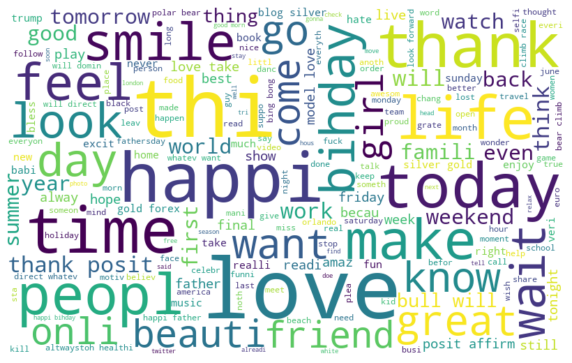

In [29]:
# untuk melihat semua kata yang mengalami sentimen analisis

all_words = ' '.join([text for text in merge['clean_tweet']])
plot_wordCloud(all_words)

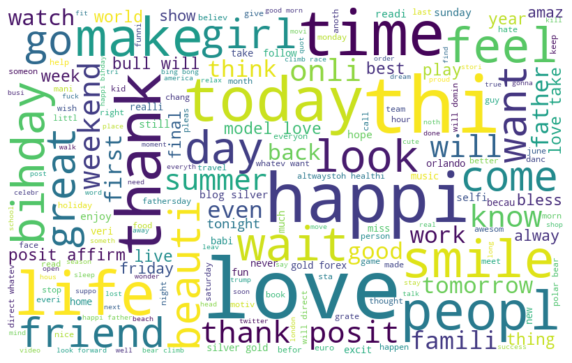

In [30]:
#untuk melihat kata kata yang normal atau netral
normal_words = ' '.join(text for text in merge['clean_tweet'][merge['label'] == 0]) 
plot_wordCloud(normal_words)

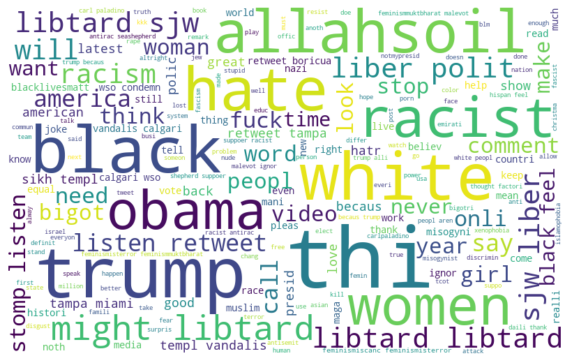

In [31]:
#untuk melihat kata-kata yang negatif
negative_words = ' '.join(text for text in merge['clean_tweet'][merge['label'] == 1]) 
plot_wordCloud(negative_words)

## Extracting Features

### Bag-of-words

Bag of word merupakan representasi penyederhanaan yang digunakan dalam NLP. Dalam model ini, direpresentasi sebagai bag (multiset) kata-katanya, mengabaikan tata bahasa dan urutan kata tetapi tetap berkembang

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(merge['clean_tweet'])

### TF_IDF

TF-IDF atau Term Frequency-Inverse Document Frequency, merupakan proses pemberian bobot term pada dokumen. Pembobotan ini dogunakan untuk melakukan klasifikasi data.

In [33]:
tfidf_vectorizer = CountVectorizer(max_df=0.90, max_features=1000, stop_words='english')
tfidf = bow_vectorizer.fit_transform(merge['clean_tweet'])

### Word2vec

Word2vec adalah metode embedding word yang berguna untuk mempresentasikan kata menjadi sebuah vektor dengan panjang N. 

In [34]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x: x.split()) #tokenize

import gensim
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,
            window = 5, #ukuran jendela
            min_count =2,
            sg = 1, #skip gram model
            hs = 0,
            negative = 10, #jumlah contoh kata negatif
            workers = 2,
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(merge['clean_tweet']), epochs=20)

(6510518, 7536020)

In [35]:
model_w2v.wv.most_similar(positive="obama")

[('michel', 0.6404349207878113),
 ('#paladino', 0.5764338970184326),
 ('vaniti', 0.5517618656158447),
 ('bovin', 0.5498565435409546),
 ('#fyi', 0.549710750579834),
 ('jibe', 0.5474573373794556),
 ('jarrett', 0.5443063974380493),
 ('barrack', 0.5433996319770813),
 ('leaki', 0.5382785797119141),
 ('cabbag', 0.5349551439285278)]

Pembuatan vektor untuk setiap tweet dengan mengambil rata-rata vektor dari kata kata yang ada di tweet

In [36]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # apabila ada kasus dimana token tidak ada dalam kosa kata
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

C:\Users\Win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

## Classification

#### Support Vector Machine (SVM)

SVM merupakan salah satu metode klasifikasi dengan menemukan hyperplance yang membedakan dua kelas dengan baik. Teknik ini digunakan untuk mentranformasikan data dan kemudian menemukan batas optimal.

Bag-of-words

In [38]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [39]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

#ganti data ke training dan validasi set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['label'], random_state=42, test_size=0.5)


In [40]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) #menghitung f1-score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Precision score:  [0.95801726 0.70682148]
Accuracy Score:  0.9471872849008197
F1_Score: 0.5357535753575358


TF-IDF

In [41]:
train_tfidf = bow[:31962,:]
test_tfidf = bow[31962:,:]

#ganti data ke training dan validasi set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, data_train['label'], random_state=42, test_size=0.5)


In [42]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) #menghitung f1-score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision_score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Precision score:  [0.95807443 0.70520231]
Accuracy Score:  0.9471247105938302
F1_Score: 0.5359692476661175


Word2Vec

In [43]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [44]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
F1_Score = f1_score(yvalid, prediction_int) # menghitung f1 score
print('Precision score: ', precision_score(yvalid, prediction_int, average=None)) #menghitung precision score
print('Accuracy Score: ', accuracy_score(yvalid, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Precision score:  [0.96618165 0.66666667]
Accuracy Score:  0.9487516425755584
F1_Score: 0.6022340942204952


## Evaluation

In [45]:
MODEL_ID = []
Accuracy = []
LOG_CV_ERR = []
F1Score = []
def calculate_log_cv_error(logmodel,X_train,y_train):
    ms_errors= cross_val_score(logmodel, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [46]:
def evaluate_model(logmodel,X_train,X_test,y_train,y_test,predictions):
    log_cv_error = calculate_log_cv_error(logmodel,X_train,y_train)
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
    print (f'\nAccuracy Score:  {accuracy_score(y_test,predictions)}')
    print("Cross Validation Error: ",log_cv_error)
    logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
    LOG_CV_ERR.append(log_cv_error)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.97     14852
          1       0.67      0.55      0.60      1129

avg / total       0.95      0.95      0.95     15981



Confusion Matrix:
[[14542   310]
 [  509   620]]


Accuracy Score:  0.9487516425755584
Cross Validation Error:  0.2246752248548566


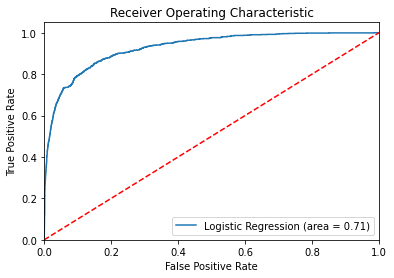

In [47]:
evaluate_model(svc,xtrain_w2v,xvalid_w2v,ytrain,yvalid,prediction_int)
MODEL_ID.append('Support Vector Classifier')
Accuracy.append(accuracy_score(yvalid, prediction_int))
F1Score.append(f1_score(yvalid, prediction_int))

SVM bekerja sangat baik dengan batas pemisah yang jelas pada dua karakteristik dan ruang berdimensi yang tinggi.